In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

#### 1) Easy Stuff

<span style="color:red;">100</span>

1.1) Use gaussian elimination to solve the following system of equations. You can do it by hands. No need to implement one.

$$
\begin{bmatrix}
1 & 2 & 3 \\
2 & -1 & 2 \\
-1 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
x\\
y \\
z
\end{bmatrix}
=
\begin{bmatrix}
13 \\
-2 \\
15
\end{bmatrix}
$$

In [4]:

A = [[1.,2,3],
    [0,-5,-4],
    [0,0,2.8]]
C = [13.,-28,5.6]
print np.linalg.solve(A,C)

print "SEE HANDED IN PAPER FOR SOLN"

SyntaxError: invalid syntax (<ipython-input-4-ec1471c431f4>, line 5)

1.2) Random number manipulation. 

Use np.random.rand() which generate uniform random real number from 0-1. To generate the following random number generator which generates

1.2.1) A uniform random real number from 0-2.

In [ ]:
x = np.random.rand(1000000)*2
plt.hist(x,bins=100)

1.2.2) A uniform random real number from 10-15

In [ ]:
x = (np.random.rand(1000000)*5)+10
plt.hist(x,bins=100)

1.2.3) A random ** integer ** which gives 0 50% of the time and  1 50% of the time.

In [ ]:
x = np.random.rand(1000000)
for i in range(len(x)):
    if (x[i]<0.5):
        x[i] = 0
    else:
        x[i] = 1
plt.hist(x,bins=100)

1.2.4) A random ** integer ** which gives 0 10% of the time and  1 20% and 2 70% of the time.

In [ ]:
x = np.random.rand(1000000)
for i in range(len(x)):
    if (x[i]<0.1):
        x[i] = 0
    elif (x[i]<0.3):
        x[i] = 1
    else:
        x[i] = 2
plt.hist(x,bins=100)

#### 2) System of Non-linear Equations

<span style="color:red;">100</span>

Find a solution to the following system of non linear equations using Newton's Method.
$$x^2 + xy = 3.63$$
$$y^2 + \exp(xy)= 16.08$$

In [ ]:
u = lambda x,y: (x**2) + (x*y) - 3.63
v = lambda x,y: (y**2) + np.exp(x*y) - 16.08

#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

In [ ]:
ux = lambda x,y: (2*x) + y
uy = lambda x,y: x
vx = lambda x,y: y*np.exp(x*y)
vy = lambda x,y: (2*y) + x*np.exp(x*y)

def uNewt(x,y,n):
    for i in range(n):
        A = [[ux(x,y),uy(x,y)],
            [vx(x,y),vy(x,y)]]
        C = [-u(x,y)+ux(x,y)*x+uy(x,y)*y,
            -v(x,y)+vx(x,y)*x+vy(x,y)*y]
        x,y = np.linalg.solve(A,C)
    return x,y

ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

sol1 = uNewt(1.,3.,10)
print sol1
plt.plot(sol1[0],sol1[1],'or')

#### 3) Implement gradient descent.

<span style="color:red;">100</span>

Implement a gradient descent method to find the minimum of the following function. Note that You ** must ** use analytic gradient.

$$f(x) = (x-1)^2 + (x+2y)^2 + (y-3)^2$$

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return ((x-1.)**2)+((x+(2.*y))**2)+((y-3.)**2)

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

In [ ]:
def gradient(w):
    x,y = w
    return np.array([(2*(x-1))+((x+(2.*y))*2),((x+(2.*y))*4)+(2*(y-3.))])

def minimization(x,y,lm,n):
    xn = np.array([x,y])
    plt.plot(xn[0],xn[1],'or')
    for i in range(n):
        gr = gradient(xn)
        xn[0] = xn[0] - lm*gr[0]
        xn[1] = xn[1] - lm*gr[1]
        plt.plot(xn[0],xn[1],'or')
    return xn[0],xn[1]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

fin = minimization(15.,-5.,0.1,100)
print fin
print f(fin[0],fin[1])

#### 4) Minimization

For this question, you may use scipy.optimize.minimize.

Consider the following data points given below. We want to describe these data points by the function

$$y = A\sin(kx +\phi)$$

Find the value of $A, k$ and $\phi$ that *best* describe the data.

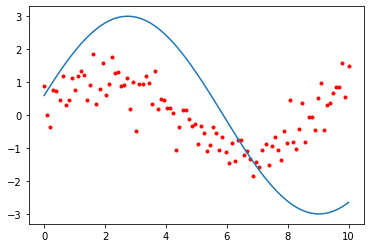

In [8]:
x = np.linspace(0,10,100)
y = np.array([ 0.87594138,  0.00187073, -0.36573143,  0.76250315,  0.71772064,
        0.44582141,  1.18984937,  0.30210475,  0.44718754,  1.13650828,
        0.77477971,  1.18729759,  1.34469878,  1.21906018,  0.45724119,
        0.90268274,  1.84135746,  0.33209727,  0.79716091,  1.58446526,
        0.60082369,  0.95656976,  1.76714422,  1.27360306,  1.29432609,
        0.8764998 ,  0.91893545,  1.13449145,  0.19556633,  1.00371468,
       -0.4917874 ,  0.95211807,  0.93085338,  1.17528794,  0.97019515,
        0.34800232,  1.33460961,  0.19541652,  0.48435961,  0.4535738 ,
        0.20263126,  0.20628831,  0.05357449, -1.05603472, -0.37243859,
        0.15929149,  0.16114982, -0.11897708, -0.31760363, -0.26226457,
       -0.87269997, -0.32289201, -0.5455574 , -1.09146517, -0.91605662,
       -0.35484732, -0.5402054 , -1.05639834, -0.6707393 , -1.1103123 ,
       -1.46841708, -0.85913281, -1.37888016, -0.76116445, -0.76145762,
       -1.21563262, -1.09119695, -1.33646586, -1.84765469, -1.40931384,
       -1.58152849, -1.04528117, -0.89163675, -1.50150266, -0.94210447,
       -0.6711762 , -1.07401834, -1.3724999 , -0.47769512, -0.84698827,
        0.44472111, -0.81110287, -1.03221068, -0.42803576,  0.37194001,
       -0.81116413, -0.04489177, -0.07186512, -0.44065763,  0.50875647,
        0.97151862, -0.44979909,  0.3019211 ,  0.36899344,  0.67941424,
        0.83858668,  0.85788781,  1.569432  ,  0.53797592,  1.47616064])
plt.plot(x,y,'.r')
plt.plot(x,3*np.sin(0.5*x+0.2))

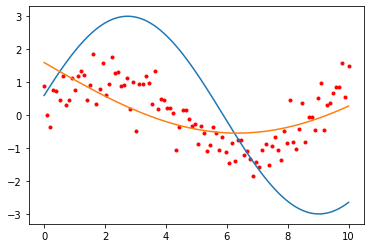

In [11]:
import scipy.optimize

def cost(w):
    A,k,phi = w
    return np.sum(((A*np.sin(k*x)+phi)-y)**2)

res = scipy.optimize.minimize(cost,[1.,1.,1.])
A,k,phi = res.x


plt.plot(x,y,'.r')
plt.plot(x,3*np.sin(0.5*x+0.2))
plt.plot(x,(A*np.sin(k*x)+phi))

#### 5) Monte Carlo Integration
<span style="color:red;">100</span>

5.1) Evaluate the following integral using Monte Carlo method.

$$ \iiint \limits_C (x+2y+3z)^2 \; dx \; dy \;dz$$

where $C$ is a sphere of radius 1 centered at $(-1,-2,-3)$

In [ ]:
def f(x,y,z):
    return (x+(2.*y)+(3.*z))**2

n = 1000000
x = (np.random.rand(n)*2)-2.
y = (np.random.rand(n)*2)-3.
z = (np.random.rand(n)*2)-4.

ans = 0.
for i in range(n):
    if ((((x[i]+1.)**2)+((y[i]+2.)**2)+((z[i]+3.)**2))<=(1.**2)):
        ans += f(x[i],y[i],z[i])
ans *= (2.**3)/n
print ans

5.2) Evaluate the following integral

$$ \iint \limits_D (x+2y)^2 \; dx \; dy$$

where $D$ is an area that is the area *inside* the blue circle but *outside* the green box shown below.

Hint: draw the line from the center to the corner of green box. What is that angle.

<img src="area.png"/>

In [ ]:
def f(x,y):
    return (x+(2.*y))**2

n = 100000
x = (np.random.rand(n)*4)-2
y = (np.random.rand(n)*4)-2

ln2 = np.sin(np.pi/4)*2
ans = 0.
for i in range(n):
    #inside circle
    if (((x[i]**2)+(y[i]**2))<=(2.**2)):
        if (x[i]>=ln2):
             plt.plot(x[i],y[i],'or')
            ans += f(x[i],y[i])
        elif (x[i]<=-ln2):
             plt.plot(x[i],y[i],'or')
            ans += f(x[i],y[i])
        elif (y[i]>=ln2):
             plt.plot(x[i],y[i],'or')
            ans += f(x[i],y[i])
        elif (y[i]<=-ln2):
             plt.plot(x[i],y[i],'or')
            ans += f(x[i],y[i])
ans *= (4.**2)/n
print ans

#### 6) Monte Carlo Simulations.

<span style="color:red;">100</span>

Let us consider a game where you have 49% of winning and 51% of losing.

You start with 20 coins. On each turn you bet 1 Baht. If you win you get 2 Baht back(making 1 Baht profit). If you lose, you lose 1 Baht that you bet. The game ends after 100 games or you lose all your money.

What is the probability that you have strictly more than 20 Baht at the end of the game?

In [ ]:
def prob(coins,n,turns):
    profit = 0
    for i in range(n):
        curr = coins
        for j in range(turns):
            c = np.random.rand()
            if (c<0.49):
                curr += 1
            else:
                curr -= 1
            if (curr==0):
                break
        if (curr>20):
            profit += 1
    return float(profit)/n

print prob(20,100000,100)

#### 7) Match making.

<span style="color:red;">100</span>

A good match making system is an essential system for online game like DOTA. The system involve making 2 teams of 5 player each(10 Player in total) from a pool of people waiting to play the game.

First, the match would not be fun if the two teams are too different in skills. The array below of 200 people. 

But if we only focus on balancing the overall score we might create the the team with 4 pros(Tae Won, Bossy, AJ Sunsern, Nop) and 1 new player(John) pitching against another team of similar composition. This would not be a very fun game since John will get blamed for all the poor decisions he made.

A better match making system can be made by not only making sure that both teams has similar skill but also making sure that only similar skill players are in the same team.

Your job is to implement an algorithm that find a good match. 1) Two teams must have similar overall skill. 2) and skill difference in each team should be small.

Hint: If you forgot, Python has a short way to check whether something is in the list or not. eg: `2 in [1,2,3]` returns True and `4 in [1,2,3]` returns False.

This is open ended question. You just need a sensible cost function.

In [ ]:
skill = np.array([ 1036.41323553,   779.64959813,   884.88992042,  1154.11217727,
         636.09231606,  1083.31417449,   899.77139923,   900.78370824,
         843.99439496,  1163.8260374 ,   947.29801927,  1018.19993222,
         647.8521486 ,  1028.18250279,   744.78576711,   820.08467693,
        1019.96585248,   924.91908776,   827.57264474,  1140.52648019,
        1299.86015419,   910.33790805,  1307.34307106,   764.70163277,
        1208.43024923,   904.48057462,  1243.66856818,  1404.41573825,
        1148.82782336,   770.81824778,  1187.91949848,  1127.73722148,
         892.86242549,  1032.00510862,   832.05508914,  1128.8881727 ,
         887.09198455,  1157.6374174 ,   963.04233564,   974.16336742,
         784.19565874,   902.72622295,  1122.01246893,   809.47013347,
        1101.26250493,  1292.23166119,   694.38082411,  1130.39186495,
        1121.2640599 ,   975.5762228 ,   871.32984072,  1289.21947005,
        1120.30038031,  1092.64292734,  1398.74986041,  1233.20231417,
         952.78602484,  1242.5306623 ,  1108.6993943 ,  1077.08009286,
         808.42541901,  1071.0748471 ,  1026.76640856,  1125.37236183,
        1162.94641729,   809.19013877,   992.62256346,  1033.88640403,
        1104.86256426,  1197.38359748,   853.6803351 ,  1011.09650518,
        1012.98591658,   718.70886706,   667.89164265,  1248.77861984,
        1176.06304616,  1236.65444327,  1032.46560601,  1091.701724  ,
        1073.85827097,  1060.82122062,  1370.90926994,   739.18452974,
         839.02467662,  1463.91729159,  1085.16850893,   729.21088856,
         876.9242819 ,   947.60271498,  1006.8440154 ,  1074.33878304,
        1113.22079402,  1355.71242029,  1233.86524524,   903.90363635,
        1018.5828025 ,   604.88562896,   916.45182323,  1268.30797604,
        1090.92557809,  1168.96017069,   981.05284388,  1219.43184896,
        1152.17689387,   753.67971064,  1084.80922048,   728.89338589,
        1044.12976277,  1063.1914928 ,  1040.78480847,  1390.25923403,
        1198.05439333,  1293.15741172,  1032.50191447,   949.30725077,
         830.76766521,   930.99089196,  1321.27758537,   737.89207057,
         844.03282794,  1152.96153267,  1019.07639006,  1234.39541091,
        1330.66093245,   896.5382043 ,   852.6928155 ,   927.52847247,
        1099.40887544,  1020.29281441,  1192.87253213,  1132.64363953,
        1059.1476316 ,  1176.86448769,   946.27290292,   574.96378169,
         854.3525837 ,  1036.78391062,   964.71387327,  1238.02427937,
        1058.82361331,   772.39751114,   844.04999331,   932.85421456,
        1169.73823521,   884.93790911,   688.26146826,   864.79557755,
        1162.3345688 ,  1222.46495685,  1369.20256643,   764.15535369,
        1153.12150432,   993.4003862 ,   958.44653991,   963.98091012,
         943.5108768 ,   822.76978185,   679.14056294,  1052.8367666 ,
        1060.02235278,   928.3539241 ,   902.27344952,   916.2877734 ,
        1253.42369015,   936.86828777,   959.65247446,  1181.05832829,
         859.96436822,  1097.58886974,  1249.02481832,   859.01563631,
        1038.20295468,   970.57034018,  1055.22427415,   655.4029039 ,
         962.90703416,   529.77003785,  1371.08904716,   921.53323368,
        1106.5355557 ,  1016.81650559,  1004.55265434,  1230.3835476 ,
        1208.91112765,  1093.48896004,   918.11556215,  1257.61868138,
         669.49938027,  1025.28199332,  1164.40565037,  1003.91847136,
         973.82117685,  1245.93898465,   890.40483594,   773.88217805,
        1164.99307426,  1119.15640114,   933.47025098,   917.13085854])

In [ ]:
def cost(w):
    t1,t2 = w
    
    sum1,sum2 = 0.,0.
    #teamDiff
    for j in range(5):
        sum1 += skill[t1[j]]
        sum2 += skill[t2[j]]
    skillDiffTeams = (sum1-sum2)**2
    
    #playerDiff
    mean1 = sum1/5.
    mean2 = sum2/5.
    diff1,diff2 = 0.,0.
    for j in range(5):
        diff1 += (skill[t1[j]]-mean1)**2
        diff2 += (skill[t2[j]]-mean2)**2
    skillDiffPlayer = diff1+diff2
    
    return (skillDiffTeams + skillDiffPlayer)

def dotaMatching(team1,team2,n):
    costSoFar = cost([team1,team2])
    for i in range(n):
        x = np.random.randint(0,200)
        if ((x in team1) or (x in team2)):
            continue
        else:
            minC = costSoFar
            mt1 = np.copy(team1)
            mt2 = np.copy(team2)
            for j in range(5):
                tmp1 = np.copy(team1)
                tmp1[j] = x
                tcost = cost([tmp1,team2])
                if (tcost<minC):
                    mt1 = tmp1
                    mt2 = team2
                    minC = tcost
            for j in range(5):
                tmp2 = np.copy(team2)
                tmp2[j] = x
                tcost = cost([team1,tmp2])
                if (tcost<minC):
                    mt1 = team1
                    mt2 = tmp2
                    minC = tcost
            team1 = mt1
            team2 = mt2
    return team1,team2

start1 = [0,1,2,3,4]
start2 = [5,6,7,8,9]

m1,m2 =  dotaMatching(start1,start2,10000)
print "team1 = " + str(m1)
print "team2 = " + str(m2)

s1,s2 = [],[]
for j in range(5):
    s1.append(skill[m1[j]])
    s2.append(skill[m2[j]])
print "skills1 = " + str(s1)
print "sum1 = " + str(np.sum(s1))
print "skills2 = " + str(s2)
print "sum2 = " + str(np.sum(s2))

#### 8) X-men. 

<span style="color:red;">100</span>

This problem would be very easy if you have done homework 8.

To have a super power in X-men one need to consider what gene a person have in the last 20 position of your genome.

A gene consists of coding of four types of neucleotide G,T,C,A. For example the last 20 position of your gene may look like

 CAGTCGATGACTGTCATACG

Law of x-men dictates that you can **only have 5 of each neucleotide in the last 20 genes**.

These genes dictates how much power you have and here is the list of super power. How much power each gene gives you is given in the list below.

For example, let us consider the power of the 5 following gene

  AAACG
  
You will get power from AAA, AAC, ACG which is 4.5+9.1+10.1. The important part is you get the power from all the substring occurences.

Your job is to use hill climbing to find the 20 genes that give you a decent amount of superpower. **Remember that you only have 5 of each type of gene.**

Note: If you do the problem with out the 5 gene of each type constrain, you will recieve some partial credit. 

In [ ]:
power  = {'AAA': 4.583090196030584,
 'AAC': 9.107506020519258,
 'AAG': 11.518014051304256,
 'AAT': 0.5943525271208183,
 'ACA': 1.1113580291024472,
 'ACC': 16.444034487254292,
 'ACG': 10.123045604089748,
 'ACT': 9.897601844020329,
 'AGA': 16.729138541558445,
 'AGC': 3.107193950552256,
 'AGG': 11.158302356539052,
 'AGT': 15.723838107032366,
 'ATA': 14.68360120193772,
 'ATC': 17.912113028518768,
 'ATG': 17.89522970059069,
 'ATT': 15.795675356834844,
 'CAA': 10.439667561647646,
 'CAC': 4.24387205852751,
 'CAG': 7.305326746947656,
 'CAT': 1.3097127939617148,
 'CCA': 3.5296095796695615,
 'CCC': 13.991581011316157,
 'CCG': 8.36957368698493,
 'CCT': 0.5914656131940332,
 'CGA': 9.620563465398078,
 'CGC': 19.200372566857652,
 'CGG': 6.960423648119118,
 'CGT': 17.11999003766589,
 'CTA': 7.510779993509679,
 'CTC': 11.641563616015931,
 'CTG': 5.680850426276871,
 'CTT': 7.835729875296169,
 'GAA': 14.57069797200856,
 'GAC': 3.2230197873225297,
 'GAG': 10.82623910262562,
 'GAT': 5.2628654997081785,
 'GCA': 1.8609059517160031,
 'GCC': 0.18994613401547733,
 'GCG': 17.375951646159898,
 'GCT': 17.308641829952567,
 'GGA': 11.552691184268845,
 'GGC': 17.114687046257387,
 'GGG': 5.809368417027086,
 'GGT': 4.624023232180572,
 'GTA': 17.71188724483854,
 'GTC': 10.745653783083727,
 'GTG': 15.936708179944787,
 'GTT': 10.193719434789749,
 'TAA': 3.893410816086078,
 'TAC': 17.498145583372565,
 'TAG': 6.182991513447269,
 'TAT': 18.58918405062135,
 'TCA': 1.3727231951472318,
 'TCC': 10.821411488062814,
 'TCG': 4.361802324865525,
 'TCT': 10.960254544132209,
 'TGA': 17.998271635446883,
 'TGC': 13.64694858961673,
 'TGG': 2.526749786232678,
 'TGT': 7.766261755331603,
 'TTA': 11.507518238991798,
 'TTC': 13.14818578961485,
 'TTG': 14.920604441566477,
 'TTT': 6.743174200372066}

In [ ]:
## here is how to loop and list all the length 3 substring
gene = 'CAGTCGATGACTGTCATACG'
for i in range(len(gene)-2):
    print gene[i:i+3],
    
print ''

#here is how you replace a character at position i
glist = list(gene) #convert to list first
glist[0]='T' #change the first character to T
gene2 = ''.join(glist) #then join all the character back to string

print gene
print gene2

#here is how to find out how much power a gene gives you
print power['TTT']

In [ ]:
def powerCost(w):
    p = 0.
    for i in range(len(w)-2):
        p += power[w[i:i+3]]
    return p

def superpower(gene, n):
    PowerSoFar = powerCost(gene)
    for i in range(n):
        x1 = np.random.randint(0,20)
        x2 = np.random.randint(0,20)
        if (x1==x2):
            continue
        glist = list(gene)
        c1 = glist[x1]
        c2 = glist[x2]
        glist[x1] = c2
        glist[x2] = c1
        newGene = ''.join(glist)
        newPower = powerCost(newGene)
        if (newPower>PowerSoFar):
            gene = newGene
            PowerSoFar = newPower
    return gene, PowerSoFar

start = 'GGGGGTTTTTCCCCCAAAAA'
endGene, endPower = superpower(start,100000)
print endGene, endPower